In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_medMNIST_data
from generative_pipeline import CustomGenerativePipeline
from custom_models.vae import VariationalAutoencoder
from torch.utils.data import DataLoader
import torch.optim
import torch.nn as nn

In [3]:
dataloader, dataset = load_medMNIST_data()

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Image size: torch.Size([3, 28, 28])
Label size: torch.Size([1])
Label values: {0, 1, 2, 3, 4, 5, 6, 7}


In [4]:
# get image size from the dataset
channels, dim_1, dim_2 = dataloader.dataset[0][0].shape

print(f"Channels: {channels}")
print(f"Dim 1: {dim_1}")
print(f"Dim 2: {dim_2}")

Channels: 3
Dim 1: 28
Dim 2: 28


In [5]:

# ********** Model * **********
model = VariationalAutoencoder(
    input_dim=channels * dim_1 * dim_2,
    hidden_dim=512,
    latent_dim=128,
)

# ********** Training parameters **********
loss_fn = nn.MSELoss()
optimizer_class = torch.optim.Adam
lr = 1e-4
n_epochs = 30

model

VariationalAutoencoder(
  (encoder): Encoder(
    (fc1): Linear(in_features=2352, out_features=512, bias=True)
    (fc21): Linear(in_features=512, out_features=128, bias=True)
    (fc22): Linear(in_features=512, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=128, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=2352, bias=True)
  )
)

Using device: cuda
Epoch 1/30, Loss: 8.9952
Epoch 2/30, Loss: 0.5599
Epoch 3/30, Loss: 0.3405
Epoch 4/30, Loss: 0.2637
Epoch 5/30, Loss: 0.2208
Epoch 6/30, Loss: 0.1931
Epoch 7/30, Loss: 0.1744
Epoch 8/30, Loss: 0.1608
Epoch 9/30, Loss: 0.1510
Epoch 10/30, Loss: 0.1430
Epoch 11/30, Loss: 0.1361
Epoch 12/30, Loss: 0.1307
Epoch 13/30, Loss: 0.1269
Epoch 14/30, Loss: 0.1235
Epoch 15/30, Loss: 0.1200
Epoch 16/30, Loss: 0.1179
Epoch 17/30, Loss: 0.1154
Epoch 18/30, Loss: 0.1132
Epoch 19/30, Loss: 0.1119
Epoch 20/30, Loss: 0.1100
Epoch 21/30, Loss: 0.1092
Epoch 22/30, Loss: 0.1077
Epoch 23/30, Loss: 0.1066
Epoch 24/30, Loss: 0.1059
Epoch 25/30, Loss: 0.1046
Epoch 26/30, Loss: 0.1039
Epoch 27/30, Loss: 0.1034
Epoch 28/30, Loss: 0.1024
Epoch 29/30, Loss: 0.1017
Epoch 30/30, Loss: 0.1015


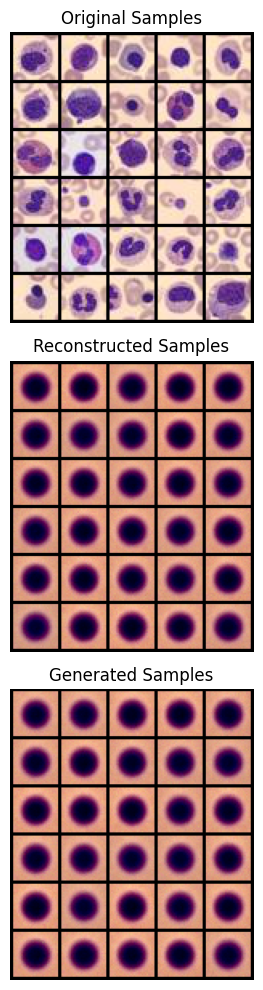

Evaluating FID for seed 1001...


c:\Users\josem\anaconda3\envs\cuda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\josem\anaconda3\envs\cuda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FID:412.33827602398475
Evaluating FID for seed 2002...
FID:412.5379324784605
Evaluating FID for seed 3003...
FID:411.956630584611
Evaluating FID for seed 4004...
FID:412.0334927195604
Evaluating FID for seed 5005...


In [ ]:
pipeline = CustomGenerativePipeline(
    model=model,
    criterion=loss_fn,
    optimizer_class=optimizer_class,
    optimizer_params={"lr": lr},
    train_dataloader=dataloader,
    train_dataset=dataset,
    n_epochs=n_epochs,
)

pipeline.execute()
pipeline.visualize(30)
pipeline.evaluate()